# Problem Statement

### Is MS Dhoni fit enough to bat in IPL ?

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#to display all rows columns 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [2]:
df1=pd.read_csv("ipl_ball_by_ball_data.csv")
df1.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.4,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [3]:
df1.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [4]:
df1.dtypes

match_id                  int64  
season                    int64  
start_date                object 
venue                     object 
innings                   int64  
ball                      float64
batting_team              object 
bowling_team              object 
striker                   object 
non_striker               object 
bowler                    object 
runs_off_bat              int64  
extras                    int64  
wides                     float64
noballs                   float64
byes                      float64
legbyes                   float64
penalty                   float64
wicket_type               object 
player_dismissed          object 
other_wicket_type         float64
other_player_dismissed    float64
dtype: object

In [5]:
df1.shape

(200663, 22)

In [6]:
df1.isnull().sum()

match_id                  0     
season                    0     
start_date                0     
venue                     0     
innings                   0     
ball                      0     
batting_team              0     
bowling_team              0     
striker                   0     
non_striker               0     
bowler                    0     
runs_off_bat              0     
extras                    0     
wides                     194582
noballs                   199853
byes                      200134
legbyes                   197459
penalty                   200661
wicket_type               190798
player_dismissed          190798
other_wicket_type         200663
other_player_dismissed    200663
dtype: int64

In [7]:
df1=df1[(df1.innings==1)|(df1.innings==2)]
df1.shape

(200502, 22)

# Approach 1 :

### The data is splitted to three year zones :

2008-2015 (CSK as team)
2017 (Rising Pune Supergiant as Team)
2018-2021 (CSK as team)

In the above 3 splits, the target is to track the performance of players via scatterplots 
and bar plots visualisation to know how MSD's performance varies compared to others over these years(2008-2021) in the tournament.
The parameters taken for visualization are 'Runs_off_bat', strike rate against the striker.

In [8]:
a1=df1[(df1['season']>=2008)&(df1['season']<=2015)&(df1['batting_team']=='Chennai Super Kings')]
a1.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
459,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,13.2,Chennai Super Kings,Kings XI Punjab,MEK Hussey,JDP Oram,JR Hopes,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,13.1,Chennai Super Kings,Kings XI Punjab,JDP Oram,MEK Hussey,JR Hopes,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
461,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,12.8,Chennai Super Kings,Kings XI Punjab,JDP Oram,MEK Hussey,WA Mota,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
462,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,12.7,Chennai Super Kings,Kings XI Punjab,MEK Hussey,JDP Oram,WA Mota,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
463,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,12.6,Chennai Super Kings,Kings XI Punjab,JDP Oram,MEK Hussey,WA Mota,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
a1['season'].value_counts()

2012    2183
2013    2098
2015    2069
2011    1947
2010    1946
2014    1923
2008    1874
2009    1709
Name: season, dtype: int64

In [10]:
df1['batting_team'].value_counts()

Mumbai Indians                 25320
Royal Challengers Bangalore    23557
Kolkata Knight Riders          23393
Kings XI Punjab                22622
Chennai Super Kings            22299
Rajasthan Royals               19829
Delhi Daredevils               18780
Sunrisers Hyderabad            15691
Deccan Chargers                9034 
Pune Warriors                  5443 
Delhi Capitals                 4942 
Gujarat Lions                  3558 
Rising Pune Supergiant         1900 
Kochi Tuskers Kerala           1582 
Rising Pune Supergiants        1580 
Punjab Kings                   972  
Name: batting_team, dtype: int64

In [11]:
df1[(df1['season']=='2016')&(df1['striker']=='MS Dhoni')] # data for dhoni as a striker in year 2016 is absent.

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed


In [12]:
a2=df1[(df1['season']==2017)&(df1['batting_team']=='Rising Pune Supergiant')]
a2.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
136845,1082592,2017,2017-04-06,Maharashtra Cricket Association Stadium,2,6.6,Rising Pune Supergiant,Mumbai Indians,SPD Smith,AM Rahane,HH Pandya,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136846,1082592,2017,2017-04-06,Maharashtra Cricket Association Stadium,2,6.5,Rising Pune Supergiant,Mumbai Indians,SPD Smith,AM Rahane,HH Pandya,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136847,1082592,2017,2017-04-06,Maharashtra Cricket Association Stadium,2,6.4,Rising Pune Supergiant,Mumbai Indians,AM Rahane,SPD Smith,HH Pandya,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136848,1082592,2017,2017-04-06,Maharashtra Cricket Association Stadium,2,6.3,Rising Pune Supergiant,Mumbai Indians,SPD Smith,AM Rahane,HH Pandya,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136849,1082592,2017,2017-04-06,Maharashtra Cricket Association Stadium,2,6.2,Rising Pune Supergiant,Mumbai Indians,SPD Smith,AM Rahane,HH Pandya,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
a2['season'].value_counts()

2017    1900
Name: season, dtype: int64

In [14]:
df1[(df1['batting_team']=='Rising Pune Supergiant')&(df1['striker']=='MS Dhoni')]['season'].value_counts()

2017    261
Name: season, dtype: int64

In [15]:
a3=df1[(df1['season']>=2018)&(df1['season']<=2021)&(df1['batting_team']=='Chennai Super Kings')]
a3.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
150459,1136561,2018,2018-04-07,Wankhede Stadium,2,7.3,Chennai Super Kings,Mumbai Indians,KM Jadhav,MS Dhoni,JJ Bumrah,0,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150460,1136561,2018,2018-04-07,Wankhede Stadium,2,7.2,Chennai Super Kings,Mumbai Indians,KM Jadhav,MS Dhoni,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150461,1136561,2018,2018-04-07,Wankhede Stadium,2,7.1,Chennai Super Kings,Mumbai Indians,KM Jadhav,MS Dhoni,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150462,1136561,2018,2018-04-07,Wankhede Stadium,2,6.6,Chennai Super Kings,Mumbai Indians,KM Jadhav,MS Dhoni,M Markande,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150463,1136561,2018,2018-04-07,Wankhede Stadium,2,6.5,Chennai Super Kings,Mumbai Indians,KM Jadhav,MS Dhoni,M Markande,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
a3['season'].value_counts()

2019    2050
2018    1957
2020    1699
2021    844 
Name: season, dtype: int64

In [17]:
a11=pd.DataFrame(a1.groupby('striker')['runs_off_bat'].sum()).reset_index()
a11

,striker,runs_off_bat
0,A Flintoff,62
1,A Mukund,0
2,A Nehra,1
3,AS Rajpoot,2
4,B Laughlin,4
5,BB McCullum,841
6,CH Morris,14
7,CK Kapugedera,16
8,DE Bollinger,21
9,DJ Bravo,706


In [18]:
a12=pd.DataFrame(a1.groupby('striker')['ball'].count()).reset_index()
a12

,striker,ball
0,A Flintoff,57
1,A Mukund,1
2,A Nehra,7
3,AS Rajpoot,6
4,B Laughlin,9
5,BB McCullum,634
6,CH Morris,17
7,CK Kapugedera,24
8,DE Bollinger,23
9,DJ Bravo,543


In [19]:
a13=a11.merge(a12,on='striker',how='left')
a13['strike_rate']=a13['runs_off_bat']/a13['ball']*100
a13

,striker,runs_off_bat,ball,strike_rate
0,A Flintoff,62,57,108.771930
1,A Mukund,0,1,0.000000
2,A Nehra,1,7,14.285714
3,AS Rajpoot,2,6,33.333333
4,B Laughlin,4,9,44.444444
5,BB McCullum,841,634,132.649842
6,CH Morris,14,17,82.352941
7,CK Kapugedera,16,24,66.666667
8,DE Bollinger,21,23,91.304348
9,DJ Bravo,706,543,130.018416


In [20]:
## min balls criteria : 25

In [21]:
a13=a13[a13.ball>25].reset_index(drop=True)
a13

,striker,runs_off_bat,ball,strike_rate
0,A Flintoff,62,57,108.771930
1,BB McCullum,841,634,132.649842
2,DJ Bravo,706,543,130.018416
3,DJ Hussey,116,96,120.833333
4,DR Smith,965,766,125.979112
5,F du Plessis,1081,867,124.682814
6,GJ Bailey,63,67,94.029851
7,JA Morkel,827,591,139.932318
8,JDP Oram,106,107,99.065421
9,Joginder Sharma,36,30,120.000000


In [22]:
a21=pd.DataFrame(a2.groupby('striker')['runs_off_bat'].sum()).reset_index()
a22=pd.DataFrame(a2.groupby('striker')['ball'].count()).reset_index()
a23=a21.merge(a22,on='striker',how='left')
a23['strike_rate']=a23['runs_off_bat']/a23['ball']*100
a23=a23[a23.ball>25].reset_index(drop=True)
a23

,striker,runs_off_bat,ball,strike_rate
0,AM Rahane,382,328,116.463415
1,BA Stokes,316,227,139.207048
2,DT Christian,79,52,151.923077
3,MA Agarwal,26,29,89.655172
4,MK Tiwary,324,242,133.884298
5,MS Dhoni,290,261,111.111111
6,RA Tripathi,391,275,142.181818
7,SPD Smith,472,400,118.000000


In [23]:
a31=pd.DataFrame(a3.groupby('striker')['runs_off_bat'].sum()).reset_index()
a32=pd.DataFrame(a3.groupby('striker')['ball'].count()).reset_index()
a33=a31.merge(a32,on='striker',how='left')
a33['strike_rate']=a33['runs_off_bat']/a33['ball']*100
a33=a33[a33.ball>25].reset_index(drop=True)
a33

,striker,runs_off_bat,ball,strike_rate
0,AT Rayudu,1379,1077,128.040854
1,DJ Bravo,248,177,140.112994
2,DL Chahar,64,52,123.076923
3,F du Plessis,1327,1009,131.516353
4,Harbhajan Singh,30,41,73.170732
5,KM Jadhav,248,263,94.296578
6,M Vijay,108,116,93.103448
7,MM Ali,206,136,151.470588
8,MS Dhoni,1108,845,131.124260
9,N Jagadeesan,33,31,106.451613


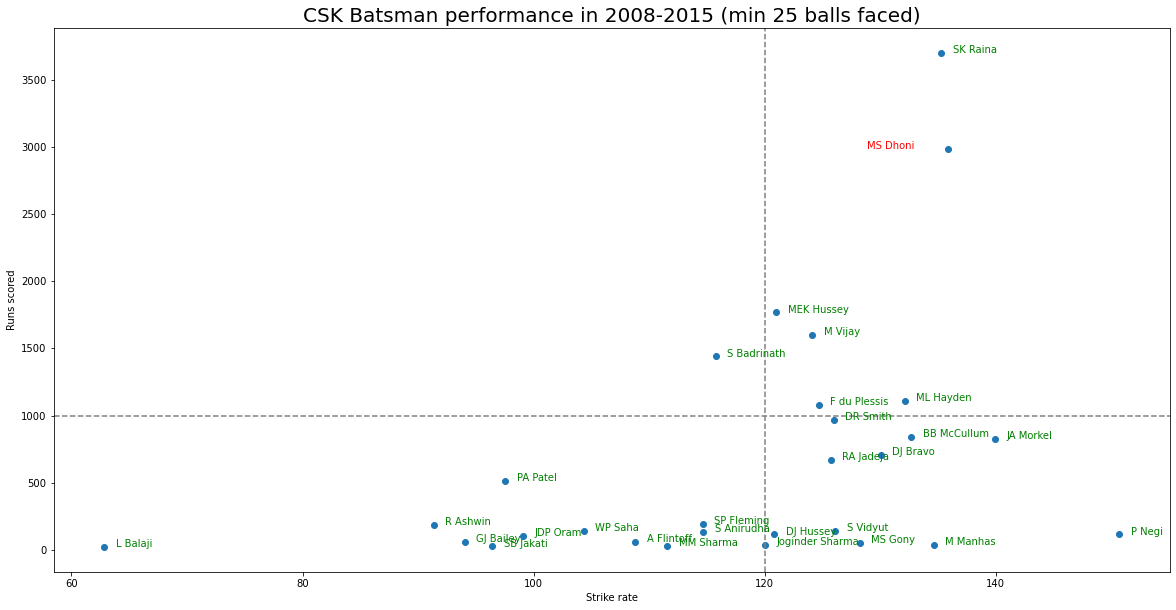

<Figure size 432x288 with 0 Axes>

In [45]:
plt.figure(figsize = (20, 10))
plt.scatter(a13.strike_rate, a13.runs_off_bat)

for i in range(len(a13)):
#     plt.text(x, y, text)
    if a13['striker'][i] == 'MS Dhoni':
        plt.text(a13['strike_rate'][i] - 7, a13['runs_off_bat'][i] - 1, a13['striker'][i],color='red' )
    else:
        plt.text(a13['strike_rate'][i] + 1, a13['runs_off_bat'][i] - 1, a13['striker'][i],color='green' )

plt.axvline(120, ls = '--', color = 'grey')
plt.axhline(1000, ls = '--', color = 'grey')
plt.title('CSK Batsman performance in 2008-2015 (min 25 balls faced)', fontsize = 20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.show()
plt.savefig('2008-15 scatter')

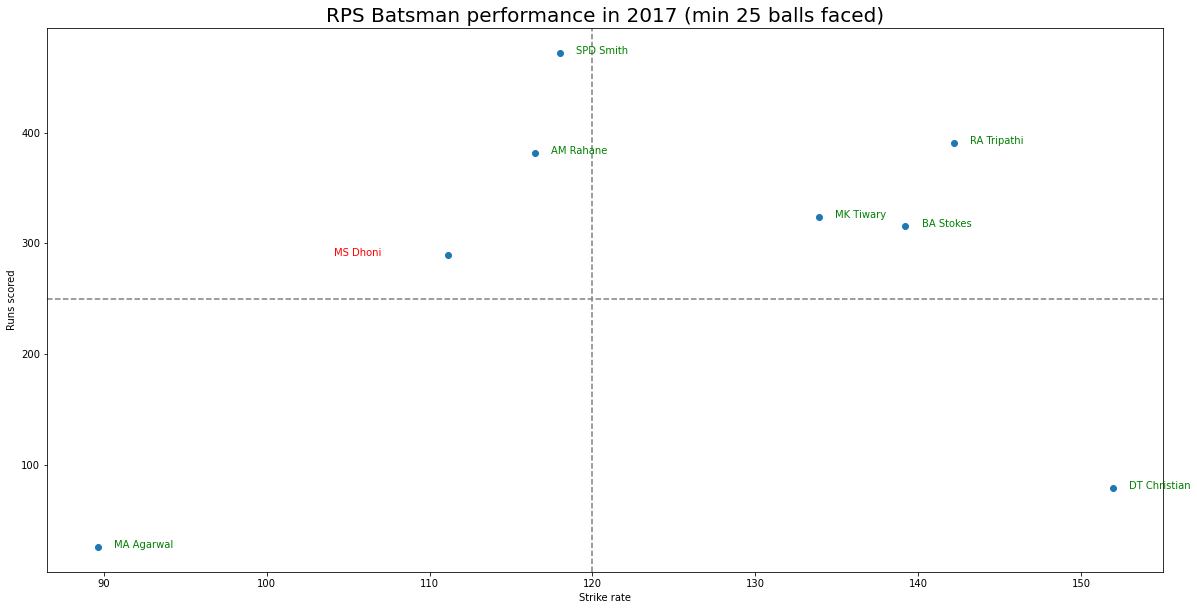

<Figure size 432x288 with 0 Axes>

In [46]:
plt.figure(figsize = (20, 10))
plt.scatter(a23.strike_rate, a23.runs_off_bat)

for i in range(len(a23)):

    if a23['striker'][i] == 'MS Dhoni':
        plt.text(a23['strike_rate'][i] - 7, a23['runs_off_bat'][i] - 1, a23['striker'][i],color='red' )
    else:
        plt.text(a23['strike_rate'][i] + 1, a23['runs_off_bat'][i] - 1, a23['striker'][i],color='green' )

plt.axvline(120, ls = '--', color = 'grey')
plt.axhline(250, ls = '--', color = 'grey')
plt.title('RPS Batsman performance in 2017 (min 25 balls faced)', fontsize = 20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.show()
plt.savefig('2017 scatter')

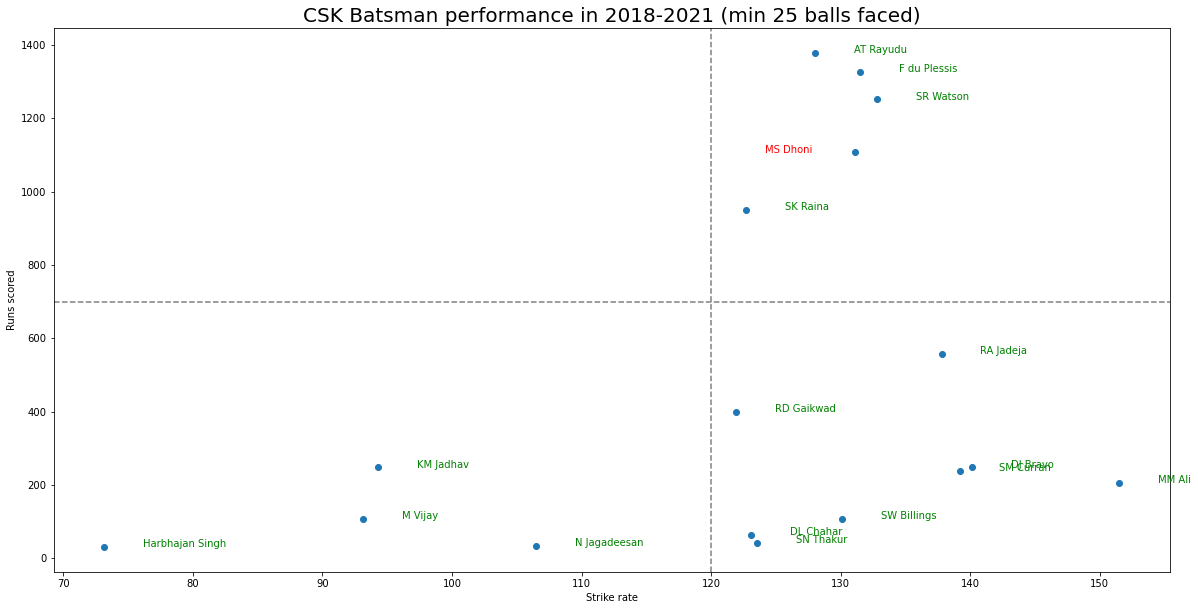

<Figure size 432x288 with 0 Axes>

In [47]:
plt.figure(figsize = (20, 10))
plt.scatter(a33.strike_rate, a33.runs_off_bat)

for i in range(len(a33)):

    if a33['striker'][i] == 'MS Dhoni':
        plt.text(a33['strike_rate'][i] - 7, a33['runs_off_bat'][i] - 1, a33['striker'][i],color='red' )
    else:
        plt.text(a33['strike_rate'][i] + 3, a33['runs_off_bat'][i] - 1, a33['striker'][i],color='green' )

plt.axvline(120, ls = '--', color = 'grey')
plt.axhline(700, ls = '--', color = 'grey')
plt.title('CSK Batsman performance in 2018-2021 (min 25 balls faced)', fontsize = 20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.show()
plt.savefig('2018-2021 scatter')

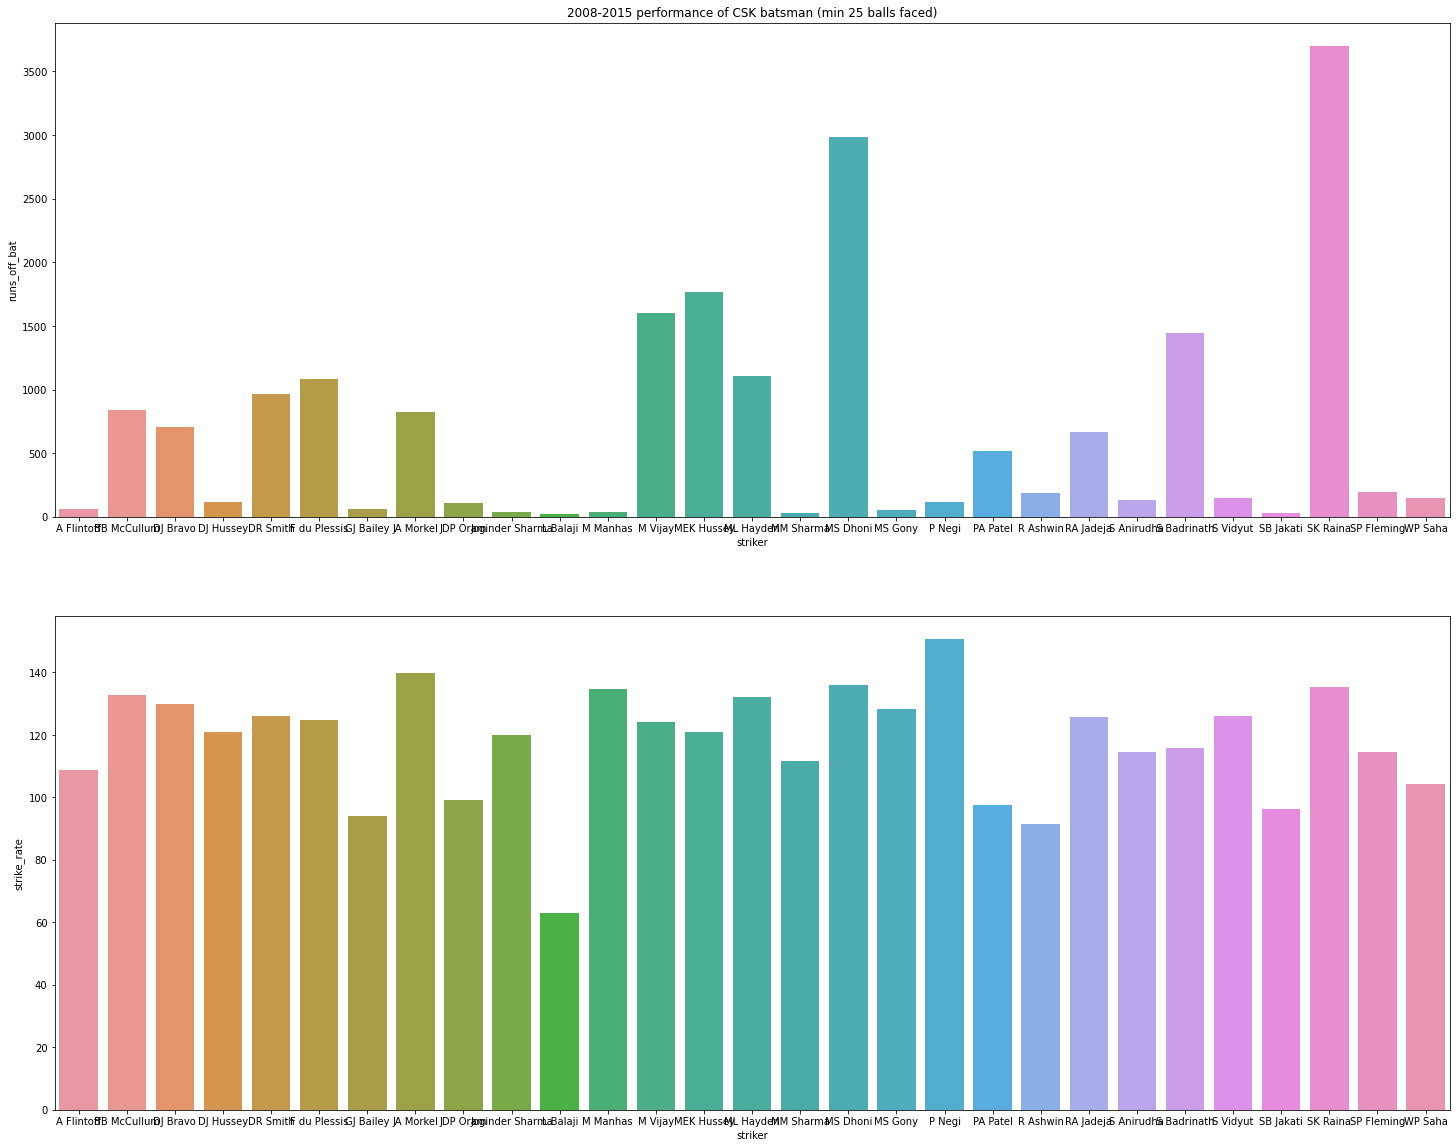

In [52]:
plt.figure(figsize=(25,20))
plt.subplot(2,1,1)
sns.barplot('striker','runs_off_bat',data=a13)
plt.title("2008-2015 performance of CSK batsman (min 25 balls faced)")
plt.subplot(2,1,2)
sns.barplot('striker','strike_rate',data=a13)
plt.savefig('barplot of 2008-15')

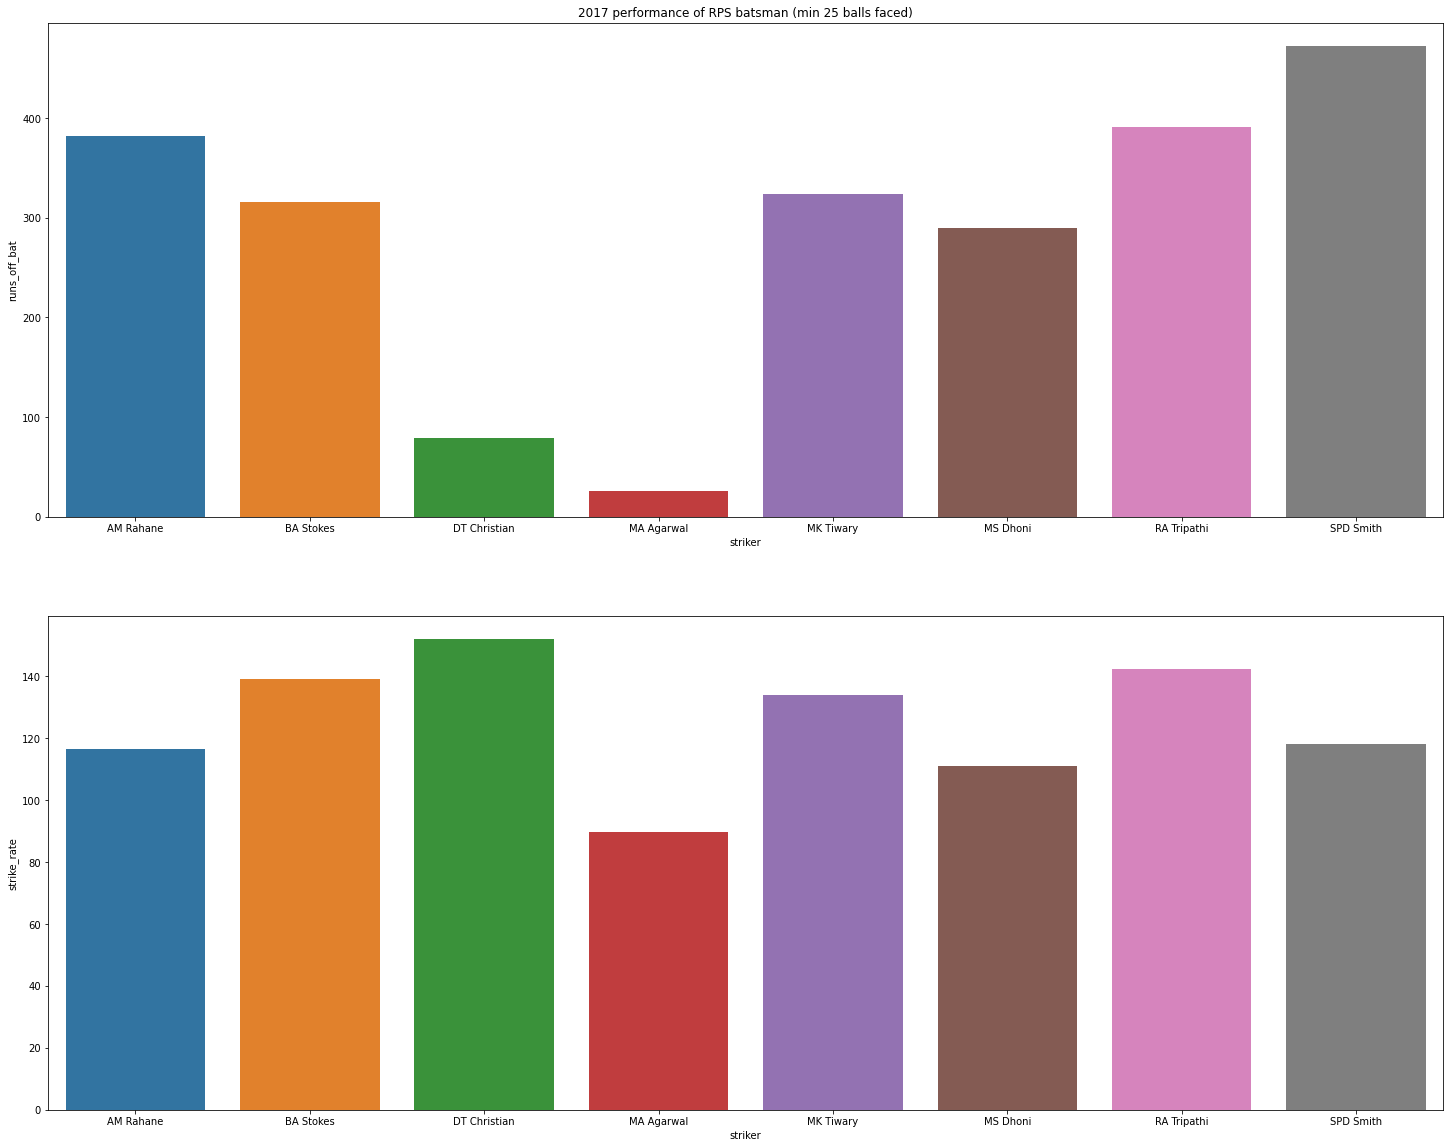

In [53]:
plt.figure(figsize=(25,20))
plt.subplot(2,1,1)
sns.barplot('striker','runs_off_bat',data=a23)
plt.title("2017 performance of RPS batsman (min 25 balls faced)")
plt.subplot(2,1,2)
sns.barplot('striker','strike_rate',data=a23)
plt.savefig('no of runs and strikerate 2017 barplot')

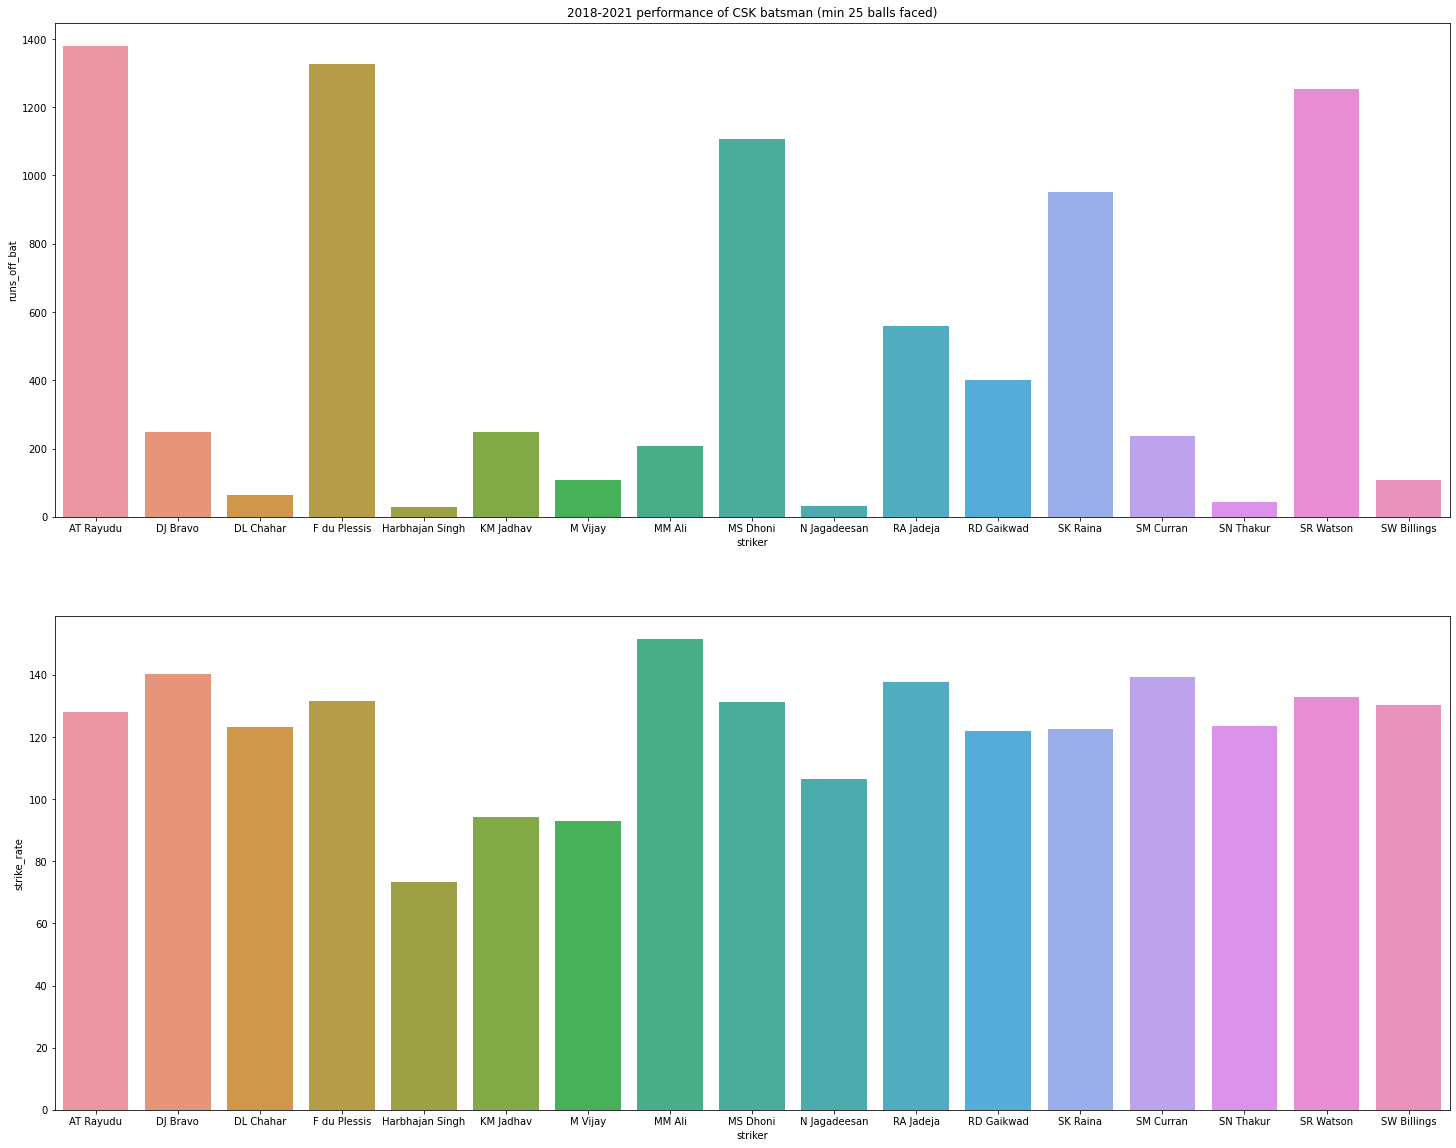

In [54]:
plt.figure(figsize=(25,20))
plt.subplot(2,1,1)
sns.barplot('striker','runs_off_bat',data=a33)
plt.title("2018-2021 performance of CSK batsman (min 25 balls faced)")
plt.subplot(2,1,2)
sns.barplot('striker','strike_rate',data=a33)
plt.savefig('no of runs and strikerate 2018-2021 barplot')

## Interpretations

From the scatterplots and barplots it can be visualised that Dhoni's peak performance was during  the period
between 2008-2015.
In 2017 the performance has been down.
In 2018-2021 again imporved.
But in 2020 and 2021 performance has gone down.
This inconsistency from 2020 onwards is not a clear indication of good performance.

## Approach 2:

The data for Dhoni as striker alone is taken.
The dataframe is formed on the basis of season and different bowling teams.
The average, stike rates and runs scored is taken for visualisations.


In [30]:
b1=pd.DataFrame(df1[(df1['striker']=='MS Dhoni')])
b1.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
556,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,7.1,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,JR Hopes,0,0,NaN,NaN,NaN,NaN,NaN,lbw,MS Dhoni,NaN,NaN
557,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,6.6,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,IK Pathan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
573,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,6.3,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,IK Pathan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1817,335989,2008,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,15.4,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,DJ Bravo,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1818,335989,2008,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,15.5,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,DJ Bravo,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
cc=pd.DataFrame(b1.groupby(['season','bowling_team'])['innings'].sum().reset_index())
cc

,season,bowling_team,innings
0,2008,Deccan Chargers,86
1,2008,Delhi Daredevils,94
2,2008,Kings XI Punjab,47
3,2008,Kolkata Knight Riders,54
4,2008,Mumbai Indians,54
5,2008,Rajasthan Royals,40
6,2008,Royal Challengers Bangalore,47
7,2009,Deccan Chargers,63
8,2009,Delhi Daredevils,22
9,2009,Kings XI Punjab,29


In [32]:
c=pd.DataFrame(b1.groupby(['season','bowling_team'])['runs_off_bat'].sum().reset_index())
c

,season,bowling_team,runs_off_bat
0,2008,Deccan Chargers,60
1,2008,Delhi Daredevils,65
2,2008,Kings XI Punjab,62
3,2008,Kolkata Knight Riders,43
4,2008,Mumbai Indians,73
5,2008,Rajasthan Royals,42
6,2008,Royal Challengers Bangalore,69
7,2009,Deccan Chargers,80
8,2009,Delhi Daredevils,11
9,2009,Kings XI Punjab,58


In [33]:
c1=pd.DataFrame(b1.groupby(['season','bowling_team'])['ball'].count().reset_index())
c1

,season,bowling_team,ball
0,2008,Deccan Chargers,59
1,2008,Delhi Daredevils,61
2,2008,Kings XI Punjab,47
3,2008,Kolkata Knight Riders,27
4,2008,Mumbai Indians,54
5,2008,Rajasthan Royals,32
6,2008,Royal Challengers Bangalore,39
7,2009,Deccan Chargers,63
8,2009,Delhi Daredevils,15
9,2009,Kings XI Punjab,29


In [34]:
c2=c.merge(c1,on=['season','bowling_team'],how='left')
c2['innings']=cc['innings']
c2

,season,bowling_team,runs_off_bat,ball,innings
0,2008,Deccan Chargers,60,59,86
1,2008,Delhi Daredevils,65,61,94
2,2008,Kings XI Punjab,62,47,47
3,2008,Kolkata Knight Riders,43,27,54
4,2008,Mumbai Indians,73,54,54
5,2008,Rajasthan Royals,42,32,40
6,2008,Royal Challengers Bangalore,69,39,47
7,2009,Deccan Chargers,80,63,63
8,2009,Delhi Daredevils,11,15,22
9,2009,Kings XI Punjab,58,29,29


In [35]:
c2['strike_rate']=100*c2['runs_off_bat']/c2['ball']
c2['average']=100*c2['runs_off_bat']/c2['innings']
c2

,season,bowling_team,runs_off_bat,ball,innings,strike_rate,average
0,2008,Deccan Chargers,60,59,86,101.694915,69.767442
1,2008,Delhi Daredevils,65,61,94,106.557377,69.148936
2,2008,Kings XI Punjab,62,47,47,131.914894,131.914894
3,2008,Kolkata Knight Riders,43,27,54,159.259259,79.629630
4,2008,Mumbai Indians,73,54,54,135.185185,135.185185
5,2008,Rajasthan Royals,42,32,40,131.250000,105.000000
6,2008,Royal Challengers Bangalore,69,39,47,176.923077,146.808511
7,2009,Deccan Chargers,80,63,63,126.984127,126.984127
8,2009,Delhi Daredevils,11,15,22,73.333333,50.000000
9,2009,Kings XI Punjab,58,29,29,200.000000,200.000000


In [70]:
pd.DataFrame(c2.groupby('season')['average'].mean())

,average
season,
2008,105.350657
2009,111.670804
2010,87.439289
2011,141.230231
2012,100.405557
2013,100.395981
2014,102.886923
2015,90.638163
2016,92.134869


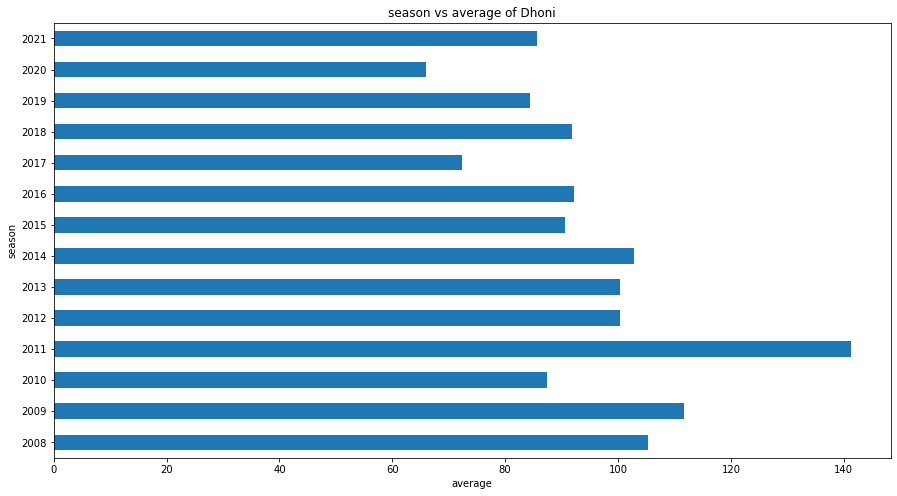

In [73]:
c2.groupby('season')['average'].mean().plot(kind='barh',figsize=(15,8))
plt.xlabel('average',fontsize=10)
plt.title('season vs average of Dhoni')
plt.savefig('season vs avg')

In [37]:
# Average was highest in 2011.
## In 2020 the average has depleted.

In [76]:
pd.DataFrame(c2.groupby('bowling_team')['average'].mean())

,average
bowling_team,
Deccan Chargers,94.925831
Delhi Capitals,45.987274
Delhi Daredevils,101.277694
Gujarat Lions,106.538462
Kings XI Punjab,108.078747
Kochi Tuskers Kerala,121.052632
Kolkata Knight Riders,103.660459
Mumbai Indians,91.803843
Pune Warriors,129.920635


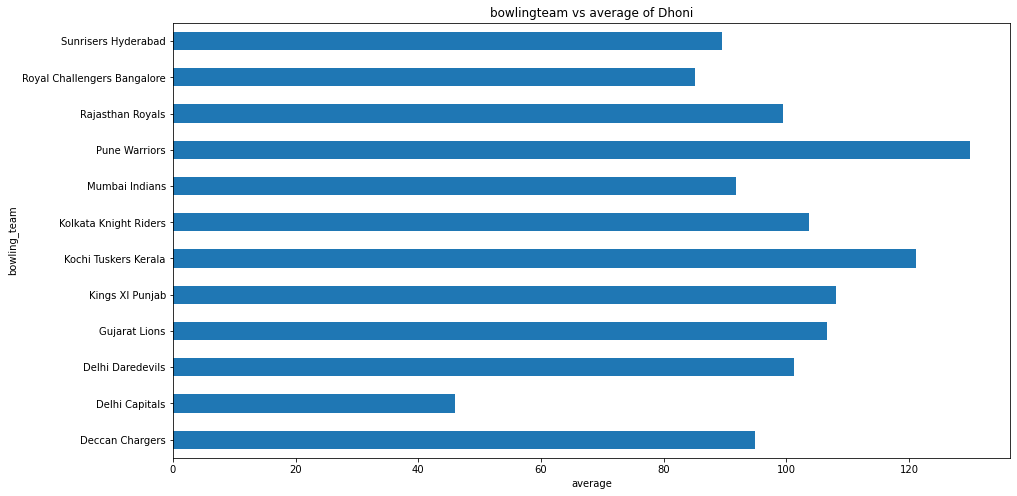

In [74]:

c2.groupby('bowling_team')['average'].mean().plot(kind='barh',figsize=(15,8))
plt.xlabel('average',fontsize=10)
plt.title('bowlingteam vs average of Dhoni')
plt.savefig('bowlingteam vs avg')

In [78]:
pd.DataFrame(c2.groupby('season')['strike_rate'].mean())

,strike_rate
season,
2008,134.683530
2009,123.604721
2010,116.602124
2011,147.214135
2012,120.366828
2013,147.538041
2014,149.506060
2015,112.141195
2016,130.633798


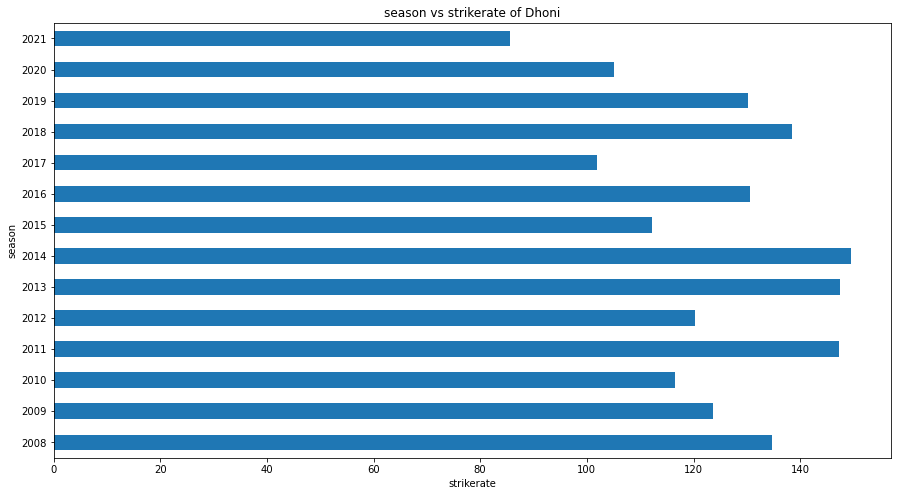

In [77]:
c2.groupby('season')['strike_rate'].mean().plot(kind='barh',figsize=(15,8))
plt.xlabel('strikerate',fontsize=10)
plt.title('season vs strikerate of Dhoni')
plt.savefig('season vs strikerate')

In [79]:
pd.DataFrame(c2.groupby('bowling_team')['strike_rate'].mean())

,strike_rate
bowling_team,
Deccan Chargers,107.195139
Delhi Capitals,77.582675
Delhi Daredevils,125.410253
Gujarat Lions,122.713178
Kings XI Punjab,139.215743
Kochi Tuskers Kerala,121.052632
Kolkata Knight Riders,127.421885
Mumbai Indians,117.749235
Pune Warriors,149.488232


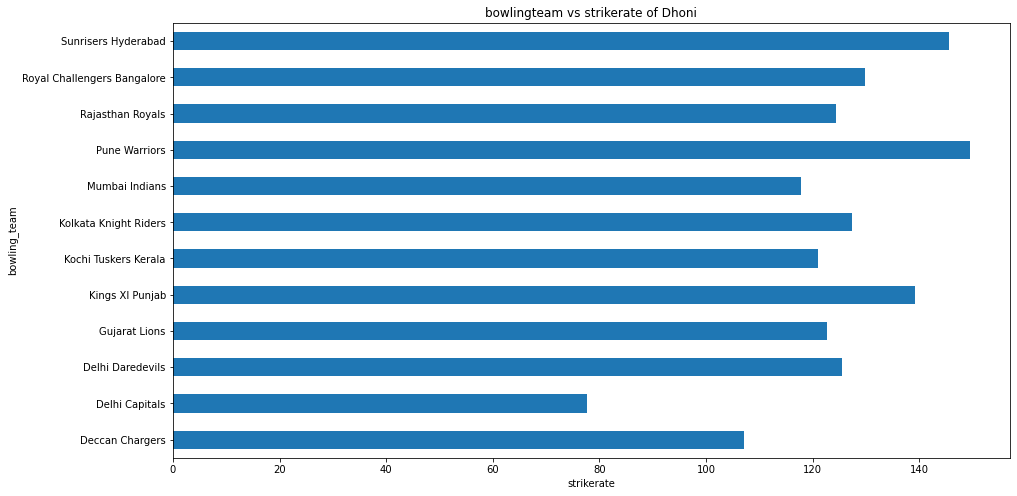

In [80]:
c2.groupby('bowling_team')['strike_rate'].mean().plot(kind='barh',figsize=(15,8))
plt.xlabel('strikerate',fontsize=10)
plt.title('bowlingteam vs strikerate of Dhoni')
plt.savefig('bowlingteam vs strikerate')

In [85]:
pd.DataFrame(c2.groupby('season')['runs_off_bat'].sum())

,runs_off_bat
season,
2008,414
2009,332
2010,287
2011,392
2012,358
2013,461
2014,371
2015,372
2016,284


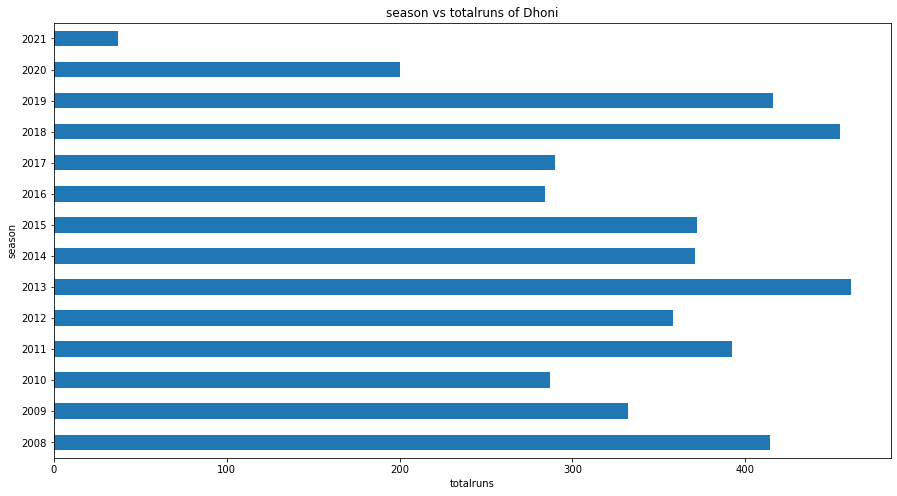

In [86]:
c2.groupby('season')['runs_off_bat'].sum().plot(kind='barh',figsize=(15,8))
plt.xlabel('totalruns',fontsize=10)
plt.title('season vs totalruns of Dhoni')
plt.savefig('season vs totalruns')

In [42]:
## Maximum runs scored in 2013 followed by 2018,2019.
## In 2020 runs scored has gone down drastically.

In [87]:
pd.DataFrame(c2.groupby('bowling_team')['runs_off_bat'].sum())

,runs_off_bat
bowling_team,
Deccan Chargers,281
Delhi Capitals,103
Delhi Daredevils,487
Gujarat Lions,83
Kings XI Punjab,595
Kochi Tuskers Kerala,23
Kolkata Knight Riders,500
Mumbai Indians,679
Pune Warriors,135


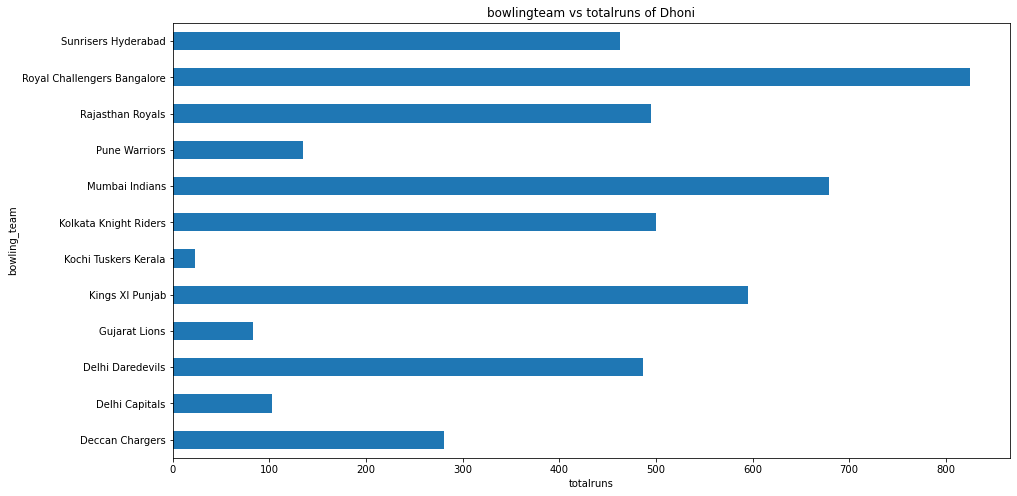

In [64]:
c2.groupby('bowling_team')['runs_off_bat'].sum().plot(kind='barh',figsize=(15,8))
plt.xlabel('totalruns',fontsize=10)
plt.title('bowlingteam vs totalruns of Dhoni')
plt.savefig('bowlingteam vs totalruns')

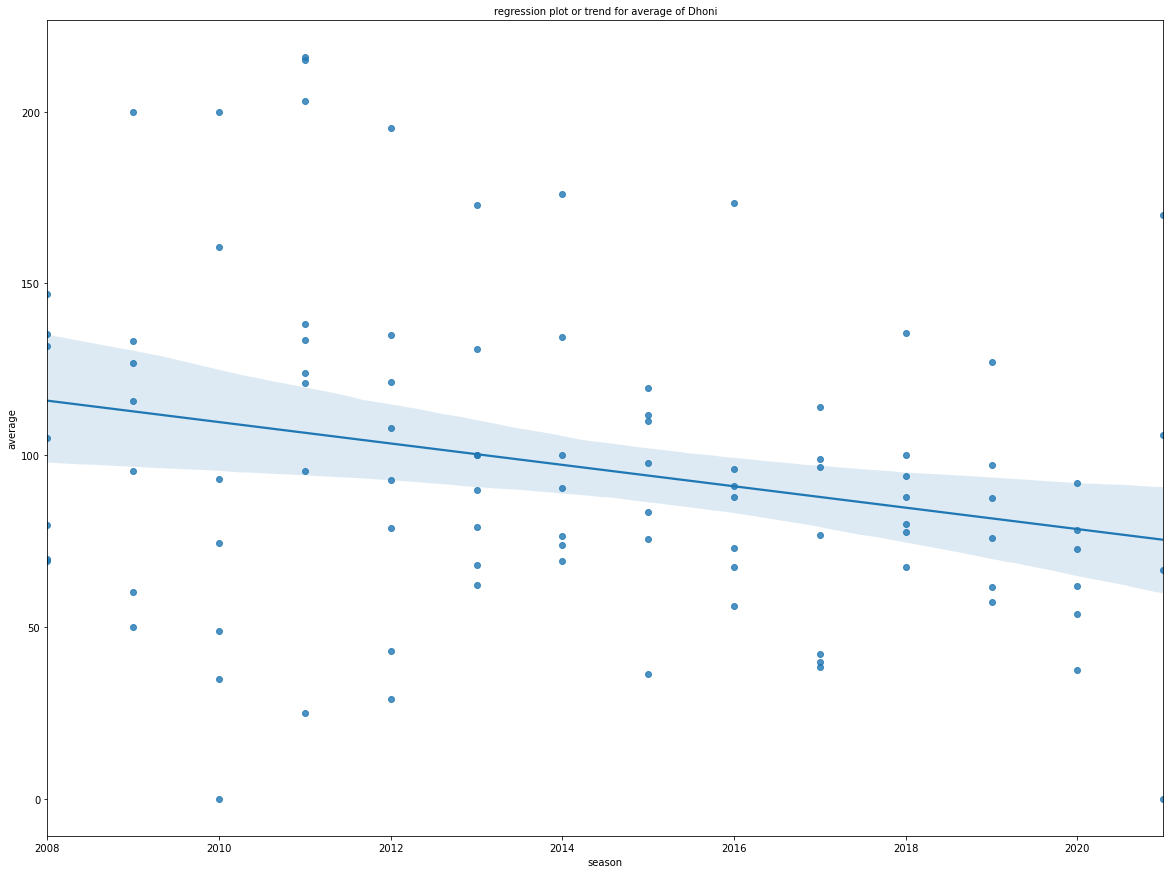

In [65]:
plt.figure(figsize=(20,15))
sns.regplot('season','average',data=c2)
plt.title('regression plot or trend for average of Dhoni',fontsize=10)
plt.savefig('regression plot for avg')

In [ ]:
## Regression line is showing a decrasing trend for the average performance of Dhoni over the years.

## Interpretations

The prime performance on the basis of average, strike rate is observed in 2011, 2013 and 2018.
Performance is going down in 2020 and 2021.

Regression fit line is showing a negative trend for the average over the different seasons.